In [27]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit

import os

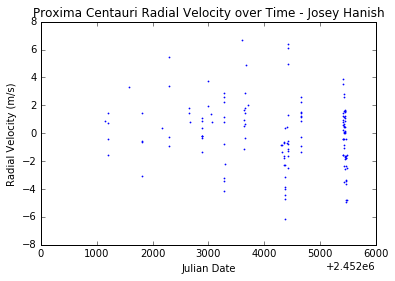

In [28]:
if os.path.isfile('proximacentaurirv.txt'):
    data = np.loadtxt('proximacentaurirv.txt')
elif os.path.isfile('rv.txt'):
    data = np.loadtxt('rv.txt')
else:
    raise RuntimeError('Cannot find data file')
julian_date = data[:,0]
radial_velocity = data[:,1]
plt.scatter(julian_date,radial_velocity,s=0.6,color='blue')
plt.xlabel('Julian Date')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Proxima Centauri Radial Velocity over Time - Josey Hanish')
plt.savefig('proxima_centauri_rv.pdf')
plt.show()
plt.close()

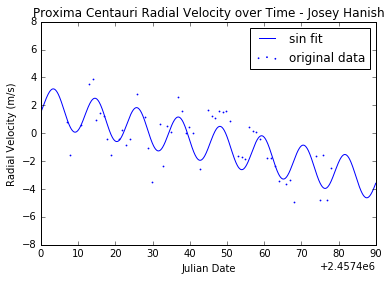

In [29]:
plt.scatter(julian_date, radial_velocity, s=0.6, color='blue', 
            label='original data')
plt.xlabel('Julian Date')
plt.ylabel('Radial Velocity (m/s)')
plt.xlim((2457400.,2457490.))
plt.title('Proxima Centauri Radial Velocity over Time - Josey Hanish')

def my_sin(x, freq, amplitude, phase, offset, linslope):
    return np.sin(x * freq + phase) * amplitude + offset \
        + linslope*(x-2457400.)

xt = np.linspace(2457400.,2457490.,num=1000)
# f = 2pi*(1/T)
my_freq = 2*np.pi*(1/11.2)
my_amp = 1.38
my_phase = 14
my_offset = 2
my_linslope = -0.06

yt = my_sin(xt, my_freq, my_amp, my_phase, my_offset, my_linslope)
plt.plot(xt, yt, label='sin fit')
plt.legend()
plt.savefig('proxima_centauri_rv_fit.pdf')
plt.show()
plt.close()

In [30]:
# # Here's some stuff I haven't made work yet
# # Please don't grade this part :)

# # https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy
# def my_sin(x, freq, amplitude, phase, offset):
#     return np.sin(x * freq + phase) * amplitude + offset

# guess_freq = 2*np.pi*(1/11.2)
# guess_amplitude = 1.38
# guess_phase = 14
# # guess_offset = np.mean(radial_velocity)
# guess_offset = 2

# p0=[guess_freq, guess_amplitude,
#     guess_phase, guess_offset]

# try:
#     fit = curve_fit(my_sin, julian_date, radial_velocity, p0=p0)
#     print fit[0]

#     xt = np.linspace(2457400.,2457490.,num=1000)

#     data_fit = []
#     for my_date in xt:
#         data_fit.append(my_sin(my_date, *fit[0]))

#     plt.figure()
#     plt.plot(xt,data_fit)
#     # plt.xlim((2457400.,2457490.))
#     plt.show()
#     plt.close()
    
# except Exception as e:
#     print e
